In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../../Data/all_Incident.csv", encoding='latin-1', low_memory=False)
df.head()

,TimeTaken,AmountinUSD,Cases_created_within_past_8_hours,Cases_resolved_within_past_8_hours,Complexity,Concurrent_open_cases,CountryProcessed_africa,CountryProcessed_asia,CountryProcessed_australia,CountryProcessed_europe,...,sourcesystem_Aplquest,sourcesystem_CLT,sourcesystem_Current Revenue,sourcesystem_Moritz Jürgensen,sourcesystem_NEMEC,sourcesystem_NMEC,sourcesystem_Web,sourcesystem_`,sourcesystem_clt,sourcesystem_web
0,1740075.0,171319.216769,1,0,0.933666,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1118105.0,0.000000,2,0,1.000000,8,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1051235.0,0.000000,3,0,1.000000,10,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1814175.0,9.000000,4,0,1.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1053716.0,0.000000,5,0,1.000000,11,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
import statsmodels.api as sm

C:\Users\Kieron\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
y = df["TimeTaken"]
X = df[["Concurrent_open_cases", "Cases_resolved_within_past_8_hours"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              TimeTaken   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     7289.
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:29:43   Log-Likelihood:            -3.7051e+05
No. Observations:               25799   AIC:                         7.410e+05
Df Residuals:                   25797   BIC:                         7.410e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Conc

In [15]:
print('Parameters:')
print(results.params)
print('\nR2: ', results.rsquared)

Parameters:
Concurrent_open_cases                 -477.732845
Cases_resolved_within_past_8_hours    4624.411691
dtype: float64

R2:  0.361053543104


In [27]:
print('Standard errors: ') 
print(res.bse)
print('\nPredicted values: ', res.predict())
y_pred = res.predict()

Standard errors: 
Concurrent_open_cases                  8.137741
Cases_resolved_within_past_8_hours    41.895256
dtype: float64

Predicted values:  [   -955.46568982   -3821.86275928   -4777.3284491  ...,  155700.8299025
  175937.50871696  192505.24153047]


In [24]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(res)

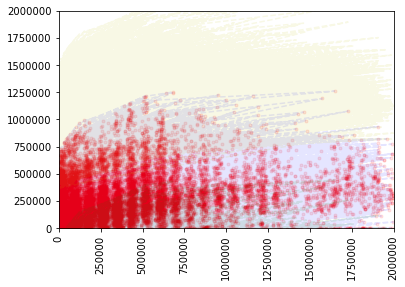

In [59]:
plt.plot(y, y_pred,"ro",alpha=0.1, markersize=3)
plt.plot(y,res.fittedvalues, "b--", alpha=0.1, markersize=3)
plt.plot(y,iv_l, "g--", alpha=0.1, markersize=3)
plt.plot(y,iv_u, "y--", alpha=0.1, markersize=3)
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.xticks(rotation="vertical")
plt.show()

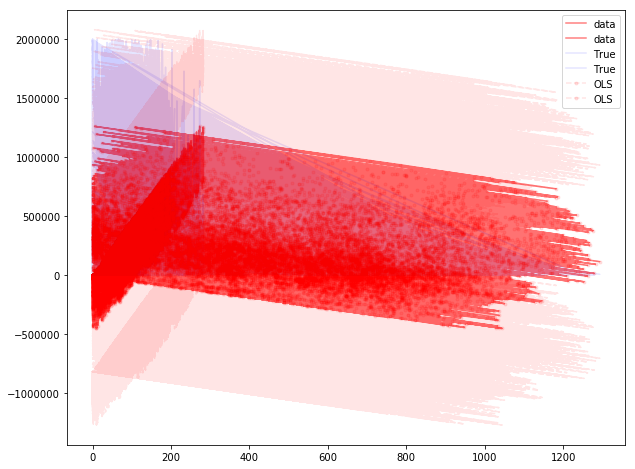

In [60]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X, y_pred, 'r',alpha=0.5, markersize=4,  label="data")
ax.plot(X, y, 'b-', label="True", alpha=0.1, markersize=2, )
ax.plot(X, res.fittedvalues, 'r--.', label="OLS",alpha=0.1)#, markersize=2, )
ax.plot(X, iv_u, 'r--',alpha=0.1)#, markersize=2, )
ax.plot(X, iv_l, 'r--',alpha=0.1)#, markersize=2, )

ax.legend(loc='best');
plt.show()